In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1- Declara Parâmetros

In [2]:
#Número de jogadores
num_samples = 10000

#Máximo e mínimo para cada jogada
maximo = 100
minimo = 0

#Distribuição da regra de decisão de cada jogador
#(recusa se o a oferta for menor que a regra)
m_decisao = 30
d_decisao = 5

#Distribuição das jogadas
m_jogo = 40
d_jogo = 7


#Jogador racional
jogada_racional = 1
decisão_racional = 1

#Inicializa dataframe
df = pd.DataFrame()

#Número de rodadas
nrodadas = 1000

### 2- Gera Rodadas

In [3]:
# Cria coluna de decisao com o jogador racional em primeiro lugar
df['decisao'] = np.clip(np.random.normal(m_decisao, d_decisao, num_samples), minimo,maximo).astype(int)
df.at[0, 'decisao'] = decisão_racional  # Definir o primeiro item como 0.1

# Criar um dicionário para armazenar todas as rodadas antes da concatenação
dados_rodadas = {}

for i in range(nrodadas):
    coluna_joga = f'rodada-{i:03d}'
    
    # Gerar valores da rodada de uma vez e armazenar no dicionário
    dados_rodadas[coluna_joga] = np.clip(np.random.normal(m_jogo, d_jogo, num_samples), minimo, maximo).astype(int)

    # Adiciona jogador racional
    idx_joga = np.random.randint(0, num_samples)
    dados_rodadas[coluna_joga][idx_joga] = jogada_racional

# Criar DataFrame com todas as rodadas e concatenar ao df original
df_rodadas = pd.DataFrame(dados_rodadas)
df = pd.concat([df, df_rodadas], axis=1)


#Exporta df para CSV
df.to_csv('df.csv',index=False)

df

,decisao,rodada-000,rodada-001,rodada-002,rodada-003,rodada-004,rodada-005,rodada-006,rodada-007,rodada-008,...,rodada-990,rodada-991,rodada-992,rodada-993,rodada-994,rodada-995,rodada-996,rodada-997,rodada-998,rodada-999
0,1,43,40,35,46,33,46,30,32,39,...,46,49,35,48,34,47,38,32,25,46
1,34,51,43,36,50,38,36,45,37,46,...,28,37,38,41,42,45,41,33,33,40
2,34,54,44,44,31,40,28,46,31,47,...,36,51,35,35,30,31,39,32,49,47
3,35,36,32,36,41,47,32,42,40,50,...,46,28,50,56,38,31,35,50,41,46
4,18,41,43,39,24,35,42,46,39,34,...,47,24,45,49,45,49,31,48,38,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30,51,44,42,28,48,28,27,40,30,...,39,33,40,44,40,46,38,42,55,27
9996,35,38,45,37,39,37,30,44,40,44,...,45,43,31,51,40,46,48,49,30,41
9997,36,34,43,29,41,37,48,32,43,38,...,43,50,34,38,37,38,49,36,44,35
9998,38,38,35,34,43,39,44,52,49,35,...,44,41,35,38,47,38,45,52,33,45


### 3- Visualiza Rodadas

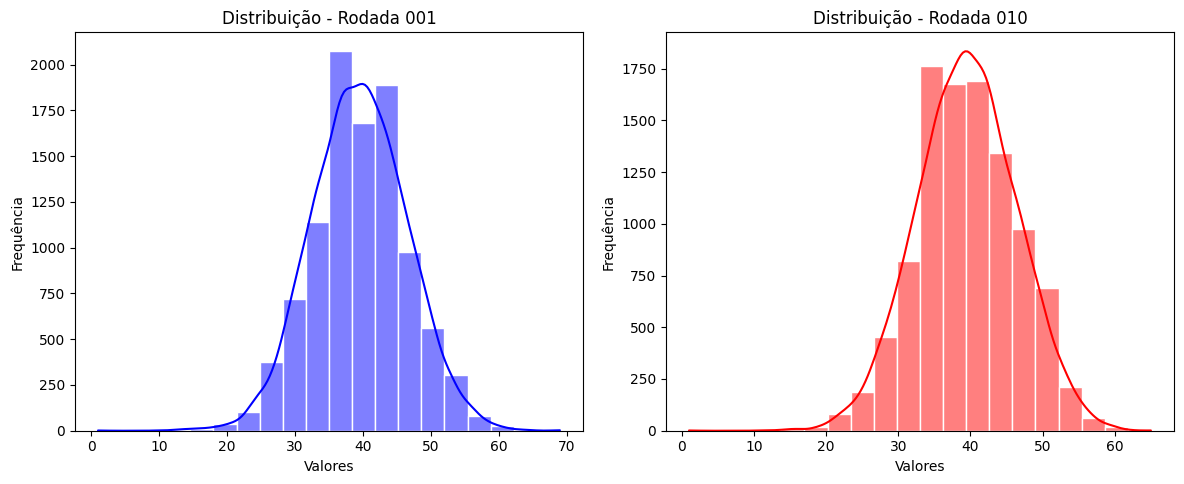

In [4]:
# Criar figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="white")

# Histograma da Rodada 001
sns.histplot(df['rodada-001'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribuição - Rodada 001')
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Frequência')

# Histograma da Rodada 010
sns.histplot(df['rodada-010'], bins=20, kde=True, color='red', ax=axes[1])
axes[1].set_title('Distribuição - Rodada 010')
axes[1].set_xlabel('Valores')
axes[1].set_ylabel('Frequência')

# Ajustar layout para melhor visualização
plt.tight_layout()

#Salva image
plt.savefig('rodadas.png', dpi=600)
# Exibir o gráfico
plt.show()


### 4- Visualiza Regra de Decisão

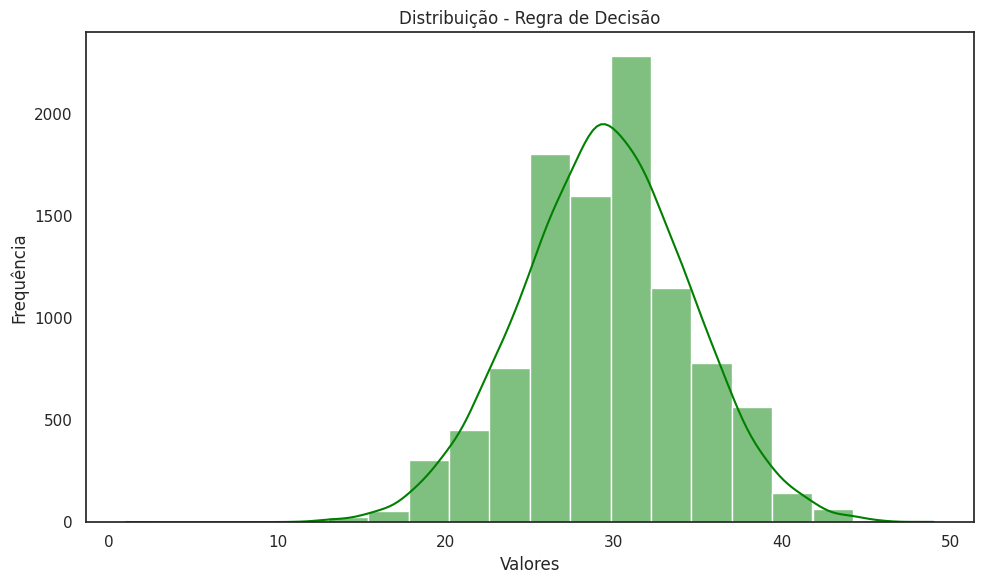

In [5]:
# Criar figura com dois subplots lado a lado
sns.set_theme(style="white")

# Histograma da Rodada 001
plt.figure(figsize=(10, 6))
sns.histplot(df['decisao'], bins=20, kde=True, color='green')
plt.title('Distribuição - Regra de Decisão')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Ajustar layout para melhor visualização
plt.tight_layout()

#Salva image
plt.savefig('decisao.png', dpi=600)

# Exibir o gráfico
plt.show()

### 5- Visualiza resultados na perspectiva da decisão

In [6]:
# Criar a coluna 'total' somando apenas valores maiores que 'decisao'
dfa = df.copy()
colunas_rodada = [col for col in dfa.columns if col.startswith("rodada")]
dfa['total'] = dfa[colunas_rodada].apply(lambda row: row[row >= dfa.loc[row.name, 'decisao']].sum(), axis=1)/nrodadas
dfa

,decisao,rodada-000,rodada-001,rodada-002,rodada-003,rodada-004,rodada-005,rodada-006,rodada-007,rodada-008,...,rodada-991,rodada-992,rodada-993,rodada-994,rodada-995,rodada-996,rodada-997,rodada-998,rodada-999,total
0,1,43,40,35,46,33,46,30,32,39,...,49,35,48,34,47,38,32,25,46,39.312
1,34,51,43,36,50,38,36,45,37,46,...,37,38,41,42,45,41,33,33,40,34.613
2,34,54,44,44,31,40,28,46,31,47,...,51,35,35,30,31,39,32,49,47,33.081
3,35,36,32,36,41,47,32,42,40,50,...,28,50,56,38,31,35,50,41,46,32.488
4,18,41,43,39,24,35,42,46,39,34,...,24,45,49,45,49,31,48,38,36,39.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30,51,44,42,28,48,28,27,40,30,...,33,40,44,40,46,38,42,55,27,37.534
9996,35,38,45,37,39,37,30,44,40,44,...,43,31,51,40,46,48,49,30,41,33.394
9997,36,34,43,29,41,37,48,32,43,38,...,50,34,38,37,38,49,36,44,35,31.491
9998,38,38,35,34,43,39,44,52,49,35,...,41,35,38,47,38,45,52,33,45,26.948


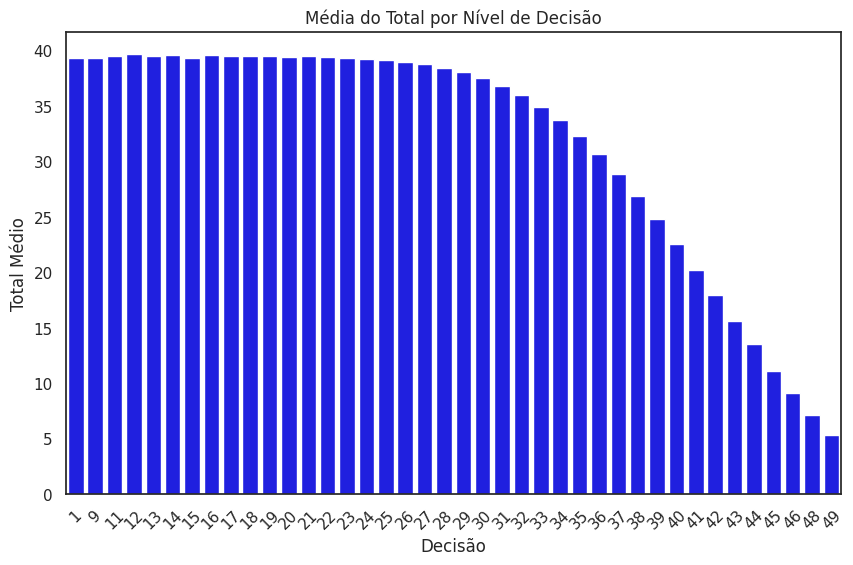

In [7]:
#Gera gráfico
dfa = dfa[['decisao','total']].groupby('decisao').mean()

sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
sns.barplot(x=dfa.index, y=dfa['total'], color="blue")

plt.xlabel("Decisão")
plt.ylabel("Total Médio")
plt.title("Média do Total por Nível de Decisão")
plt.xticks(rotation=45)

#Salva imagem
plt.savefig('media-por-decisao.png', dpi=600)

plt.show()

### 6- Visualiza Resultados na perspectiva do jogador

In [8]:
# Identificar as colunas de rodada
rodada_cols = [col for col in df.columns if col.startswith("rodada")]

# Criar o dataframe dfb com os valores únicos das colunas rodada-xxx
valores_unicos = np.unique(df[rodada_cols].values)
dfb = pd.DataFrame({"jogadas": valores_unicos})

# Criar um array de decisão replicado para comparação eficiente
decisao_array = df["decisao"].values[:, None]  # Adiciona dimensão para broadcast

# Criar uma máscara para valores onde rodada > decisão
mask_maior = df[rodada_cols].values > decisao_array

# Criar uma máscara para cada valor único
soma_pontos = {jogada: np.sum((100 - jogada) * np.sum(mask_maior & (df[rodada_cols].values == jogada), axis=1))
               for jogada in valores_unicos}

# Adicionar os valores ao DataFrame
dfb["total"] = dfb["jogadas"].map(soma_pontos)

# Criar um dicionário para armazenar a contagem de vezes que cada jogada ocorreu
contagem_jogadas = {jogada: np.sum(df[rodada_cols].values == jogada) for jogada in valores_unicos}

# Adicionar a contagem ao DataFrame dfb
dfb["quantidade"] = dfb["jogadas"].map(contagem_jogadas)
dfb["mtotal"] = dfb["total"] / dfb["quantidade"]

dfb

,jogadas,total,quantidade,mtotal
0,1,0,1000,0.0
1,3,0,3,0.0
2,4,0,1,0.0
3,5,0,1,0.0
4,6,0,4,0.0
...,...,...,...,...
70,72,392,14,28.0
71,73,108,4,27.0
72,74,78,3,26.0
73,75,50,2,25.0


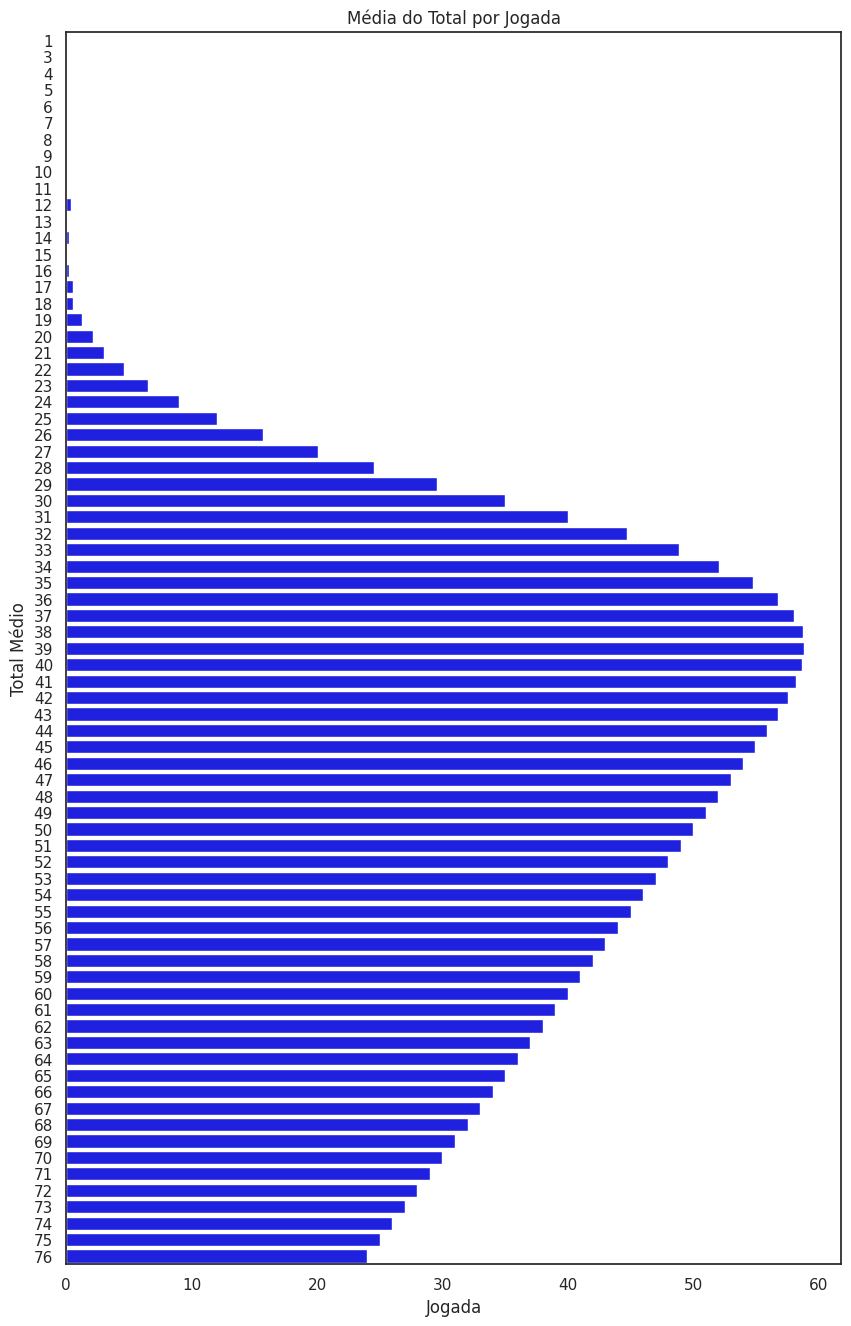

In [9]:
sns.set_theme(style="white")
plt.figure(figsize=(10, 16))
sns.barplot(y=dfb['jogadas'], x=dfb['mtotal'], color="blue",orient = 'h')

plt.xlabel("Jogada")
plt.ylabel("Total Médio")
plt.title("Média do Total por Jogada")

#Salva imagem
plt.savefig('media-por-jogada.png', dpi=600)

plt.show()